<a href="https://colab.research.google.com/github/Syzinx/Data-Mining/blob/main/Analisis_data_tips_pelayan_restoran_checkpoint_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANALISIS DATA RATA-RATA TIPS PELAYAN RESTORAN**

#**Import Library**

In [879]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari analisis data mengenai tips pelayan restoran adalah untuk memperoleh pemahaman yang lebih baik tentang faktor-faktor yang memengaruhi jumlah tips yang diberikan oleh pelanggan kepada pelayan. Dalam industri restoran, tips tidak hanya menjadi sumber pendapatan tambahan bagi pelayan, tetapi juga menunjukkan tingkat kepuasan pelanggan terhadap layanan yang mereka terima. Oleh karena itu, dengan mengetahui faktor-faktor yang memengaruhi jumlah tips yang diberikan oleh pelanggan kepada pelayan.


##**Assess Situation**

Situasi bisnis yang mendasari analisis data ini adalah persaingan ketat di industri restoran, yang menuntut peningkatan kualitas layanan dan inovasi untuk memenangkan pasar.

##**Data Mining Goals**

Tujuan dari data mining ini adalah untuk mengetahui apa saja yang mempengaruhi jumlah tips yang diberikan, seperti kualitas layanan, gender, waktu kunjungan, atau total harga makanan yang dikeluarkan pelanggan. Selain itu, analisis juga dimaksudkan untuk membuat model prediksi yang dapat memperkirakan jumlah tips yang mungkin diberikan oleh pelanggan dalam kondisi tertentu.

##**Project Plan**

Untuk memulai rencana proyek untuk menganalisis data tips pelayan restoran, data transaksi akan dikumpulkan dari sistem Point of Sale (POS) restoran. Setelah itu, data akan disusun dan dipelajari untuk memahami karakteristiknya dan menemukan pola yang menarik terkait jumlah tips yang diberikan pelanggan. Langkah selanjutnya adalah mengeksplorasi data untuk mengetahui bagaimana variabel seperti hari, waktu kunjungan, gender, jenis makanan yang dipesan, total harga yang dibayar pelanggan dan lainnya berhubungan dengan jumlah tips yang diberikan.

#**DATA UNDERSTANDING**




##**Collect Initial Data**

Data tentang analisa tips pada pelayan restoran yang saya dapat dari kaggle (https://www.kaggle.com/datasets/jsphyg/tipping)

In [880]:
df = pd.read_csv('https://raw.githubusercontent.com/Syzinx/Data-Mining/main/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


##**Describe Data**

####Informasi Dasar

In [881]:
print("Jumlah baris dataset:", df.shape[0])
print("Jumlah kolom dataset:", df.shape[1])

Jumlah baris dataset: 244
Jumlah kolom dataset: 7


####Informasi Lanjutan

In [882]:
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


1. total_bill:

  Nama Kolom: total_bill,
  Tipe Data: float64,
  Jumlah Data: 244,
  Penjelasan: Kolom ini menjelaskan total biaya yang harus dibayarkan oleh pelanggan untuk makanan dan minuman yang dipesan.

2. tip:

  Nama Kolom: tip,
  Tipe Data: float64,
  Jumlah Data: 244,
  Penjelasan: Kolom ini berisi jumlah tip yang diberikan oleh pelanggan.

3. sex:

  Nama Kolom: sex,
  Tipe Data: object,
  Jumlah Data: 244,
  Penjelasan: Kolom ini menunjukkan jenis kelamin pelanggan, biasanya berisi nilai 'Male' atau 'Female'.

4. smoker:

  Nama Kolom: smoker,
  Tipe Data: object,
  Jumlah Data: 244,
  Penjelasan: Kolom ini menunjukkan apakah pelanggan adalah perokok atau bukan, biasanya berisi nilai 'Yes' atau 'No'.

5. day:

  Nama Kolom: day,
  Tipe Data: object,
  Jumlah Data: 244,
  Penjelasan: Kolom ini menunjukkan hari ketika transaksi dilakukan, biasanya berisi nilai 'Thur' (Thursday), 'Fri' (Friday), 'Sat' (Saturday), atau 'Sun' (Sunday).

6. time:

  Nama Kolom: time,
  Tipe Data: object,
  Jumlah Data: 244,
  Penjelasan: Kolom ini menunjukkan waktu makan, biasanya berisi nilai 'Lunch' atau 'Dinner'.

7. size:

  Nama Kolom: size,
  Tipe Data: int64,
  Jumlah Data: 244,
  Penjelasan: Kolom ini menunjukkan jumlah orang dalam kelompok yang makan di restoran.

####Informasi Statistik Deskriptif

In [883]:
deskripsi_statistik = df.describe()
deskripsi_statistik

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#####1. total bill

- **Count**: Terdapat 244 data pada kolom total_bill.

- **Mean**: Rata-rata total biaya yang harus dibayarkan oleh pelanggan adalah sekitar $19.79.

- **Std**: Standar deviasi dari total biaya adalah sekitar $8.90, menunjukkan sebaran data dari rata-rata.

- **Min**: Biaya terendah yang harus dibayarkan adalah $3.07.

- **25%**: 25% dari data memiliki total biaya kurang dari $13.35.

- **50%**: 50% dari data memiliki total biaya kurang dari $17.80.

- **75%**: 75% dari data memiliki total biaya kurang dari $24.13.

- **Max**: Biaya tertinggi yang harus dibayarkan adalah $50.81.

#####2. tip

- **Count**: Terdapat 244 data pada kolom tip.

- **Mean**: Rata-rata tip yang diberikan oleh pelanggan adalah sekitar $3.00.

- **Std**: Standar deviasi dari tip adalah sekitar $1.38.

- **Min**: Tip terendah yang diberikan adalah $1.00.

- **25%**: 25% dari data memiliki tip kurang dari $2.00.

- **50%**: 50% dari data memiliki tip kurang dari $2.90.

- **75%**: 75% dari data memiliki tip kurang dari $3.56.

- **Max**: Tip tertinggi yang diberikan adalah $10.00.

#####3. Size

- **Count**: Terdapat 244 data pada kolom size.

- **Mean**: Rata-rata jumlah orang dalam kelompok yang makan di restoran adalah sekitar 2.57.

- **Std**: Standar deviasi dari jumlah orang dalam kelompok adalah sekitar 0.95.

- **Min**: Jumlah orang terendah dalam kelompok adalah 1.

- **25%**: 25% dari data memiliki jumlah orang dalam kelompok kurang dari 2.

- **50%**: 50% dari data memiliki jumlah orang dalam kelompok kurang dari 2.

- **75%**: 75% dari data memiliki jumlah orang dalam kelompok kurang dari 3.

- **Max**: Jumlah orang tertinggi dalam
kelompok adalah 6.

##**Exploratory Data Analysis**

####korelasi total bill dan tip

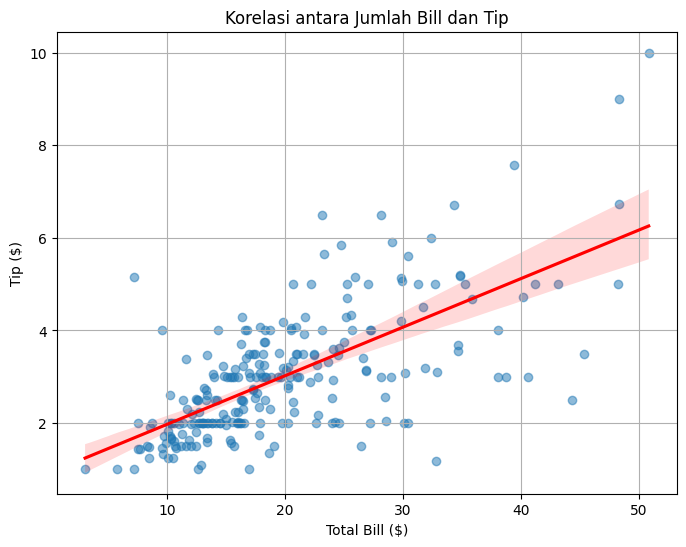

In [884]:
plt.figure(figsize=(8, 6))
sns.regplot(x='total_bill', y='tip', data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Korelasi antara Jumlah Bill dan Tip')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.grid(True)
plt.show()

Dari korelasi scatterplot tersebut, kita bisa melihat bahwa ada korelasi positif antara total_bill dan tip, yang berarti bahwa semakin besar total tagihan, semakin besar juga tip yang diberikan. Namun, perlu diingat bahwa korelasi tidak berarti sebab-akibat. Meskipun ada korelasi positif antara total_bill dan tip, kita tidak bisa menyimpulkan bahwa total tagihan yang besar menyebabkan tip yang besar.

####Pengaruh gender terhadap besaran tip

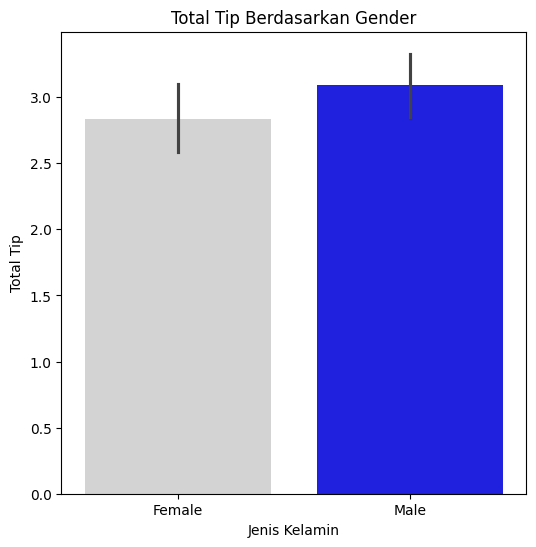

In [885]:
plt.figure(figsize=(6, 6))
sns.barplot(x='sex', y='tip', hue='sex', data=df, palette={'Male': 'blue', 'Female': 'lightgrey'}, legend=False)
plt.title('Total Tip Berdasarkan Gender')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Total Tip')
plt.show()

Hasil visualisasi menunjukkan bahwa rata-rata total tip yang diberikan oleh pelanggan pria cenderung lebih tinggi dibandingkan dengan pelanggan wanita. Dengan melihat Barplot, dapat diamati bahwa bar yang menunjukkan total tip untuk pelanggan pria (berwarna biru) lebih tinggi daripada bar yang mewakili total tip untuk pelanggan wanita (berwarna abu). Ini mengindikasikan bahwa pria cenderung memberikan jumlah tip yang lebih besar dibandingkan wanita, setidaknya dalam sampel data yang dianalisis.

####pengaruh Jumlah Tip Berdasarkan Hari

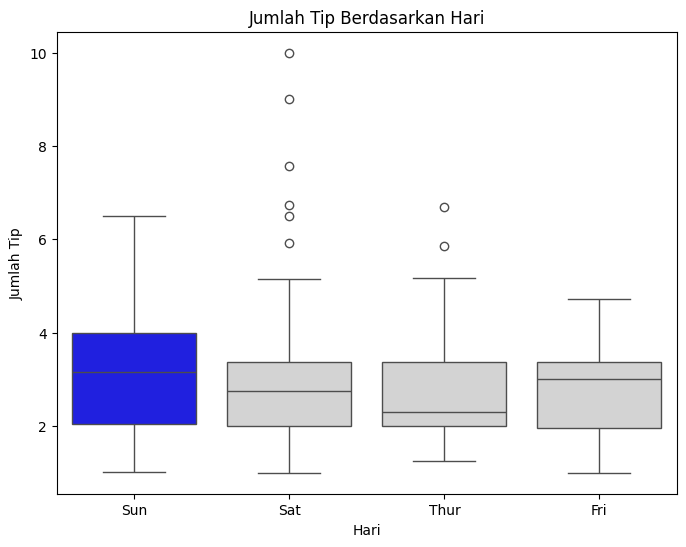

In [886]:
warna = {'Sun': 'blue', 'Thur': 'lightgrey', 'Fri': 'lightgrey', 'Sat': 'lightgrey'}

plt.figure(figsize=(8, 6))
sns.boxplot(x='day', y='tip', data=df, hue='day', palette=warna, legend=False)
plt.title('Jumlah Tip Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Tip')
plt.show()

Dari boxplot diatas, terlihat bahwa secara umum, hari Minggu memiliki jumlah tip yang lebih tinggi dibandingkan dengan hari-hari lainnya. Namun, pada hari Sabtu, terdapat banyak nilai anomali yang lebih tinggi dari rata-rata. Hal ini menunjukkan adanya kecenderungan di mana sebagian pelanggan cenderung memberikan jumlah tip yang lebih besar pada hari Sabtu. Pengaruh hari terhadap jumlah tip bisa jadi terkait dengan aktivitas atau kebiasaan makan di luar yang berbeda pada hari-hari tertentu, seperti akhir pekan atau hari libur.

#### Pengaruh Jumlah Tip Berdasarkan waktu makan (diner/lunch)

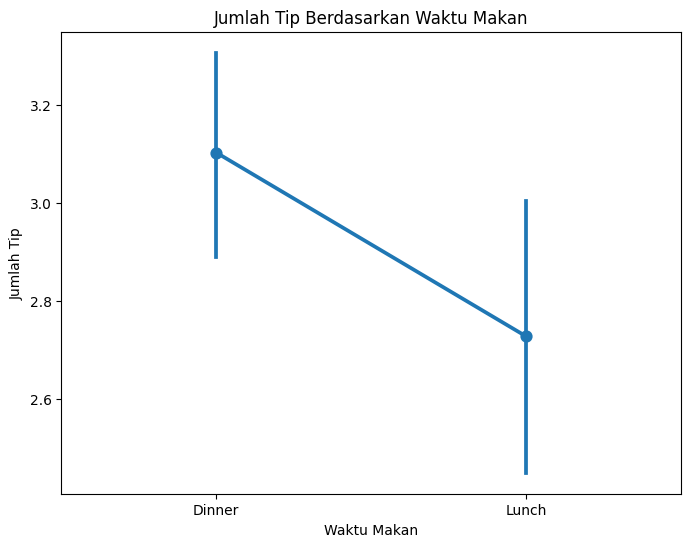

In [887]:
plt.figure(figsize=(8, 6))
sns.pointplot(x='time', y='tip', data=df)
plt.title('Jumlah Tip Berdasarkan Waktu Makan')
plt.xlabel('Waktu Makan')
plt.ylabel('Jumlah Tip')
plt.show()

Hasil visualisasi dari point plot menunjukkan bahwa rata-rata jumlah tip pada waktu makan malam (Dinner) cenderung lebih tinggi daripada pada waktu makan siang (Lunch). Titik tengah pada garis yang menunjukkan rata-rata jumlah tip pada waktu makan malam (Dinner) berada di atas titik tengah pada waktu makan siang (Lunch), menunjukkan perbedaan yang signifikan dalam jumlah tip antara dua waktu makan tersebut.

##**Verify Data Quality**

####Missing Values

In [888]:
miss = df.isnull().sum()

print("nilai kosong pada tiap kolom:")
print(miss)

nilai kosong pada tiap kolom:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


Dengan menggunakan metode .isnull().sum() pada DataFrame, kita dapat mengecek apakah ada nilai kosong (NaN) pada setiap kolom dalam dataset. Jika hasilnya menunjukkan bahwa jumlah nilai kosong pada setiap kolom adalah 0, maka artinya tidak ada nilai kosong pada kolom tersebut. Dalam konteks ini, hasil dari pengecekan menunjukkan bahwa tidak ada nilai kosong pada tiap kolom dalam dataset. Ini mengindikasikan bahwa dataset tersebut lengkap, tidak ada data yang hilang atau kosong.

####Outliers Values

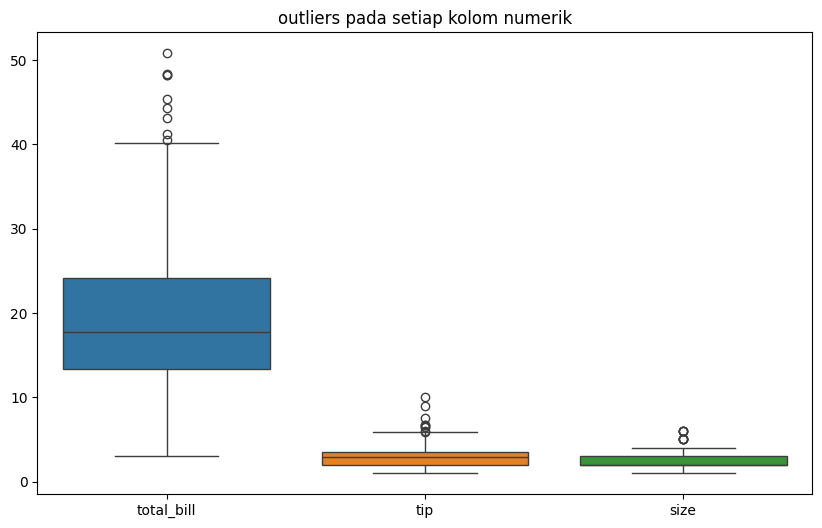

In [889]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('outliers pada setiap kolom numerik')
plt.show()


Outliers pada total_bill, tip, dan size yang menunjuk ke atas mengindikasikan bahwa terdapat nilai yang jauh lebih besar dari sebagian besar data dalam kolom-kolom tersebut. Dalam konteks ini, outliers menunjukkan adanya transaksi atau kejadian yang memiliki nilai yang signifikan secara numerik dan mungkin berbeda secara signifikan dari sebagian besar transaksi atau kejadian lainnya.

Misalnya, dalam kolom total_bill, outliers ke atas dapat mengindikasikan adanya transaksi yang sangat besar atau mewakili pembelian atau pemesanan yang tidak biasa. Dalam kolom tip, outliers ke atas dapat mengindikasikan bahwa ada pelanggan yang memberikan tip dalam jumlah yang sangat besar Sementara dalam kolom size, outliers ke atas mungkin mengindikasikan bahwa ada kelompok besar yang makan bersama di restoran, yang dapat berdampak pada volume penjualan atau tingkat keramaian restoran.

####Duplicated Values

In [890]:
df[df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2



Dari hasil pengecekan, ditemukan bahwa terdapat duplikat pada baris data diatas, Ini menunjukkan bahwa terdapat satu baris data yang memiliki nilai yang sama persis dengan baris lain dalam dataset. Dalam konteks ini, baris data ini diidentifikasi sebagai duplikat karena memiliki nilai yang identik dengan baris lainnya

# **DATA PREPARATION**

##**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

In [891]:
print((df.isna().sum() / len(df)) * 100)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64


karena tidak terdapat nilai kosong pada dataset maka tidak perlu dilakukan penanganan nilai kosong

###**Penanganan Duplicated Values**


#####**Pengecekkan Nilai Duplikat**

In [892]:
df[df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


terdapat nilai duplicate pada baris kolom 202

#####**Hapus Nilai Duplikat**

In [893]:
df = df.drop_duplicates()

menghapus nilai duplicate pada baris kolom 202

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [894]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
total_bill,3.703704
tip,3.292181
size,3.703704


terdapat outliers pada kolom total bil, tip, dan size. karena outliers pada dataset tips pelayan restoran ini valid dan relevan maka outliers tidak perlu dihapus pada dataset ini

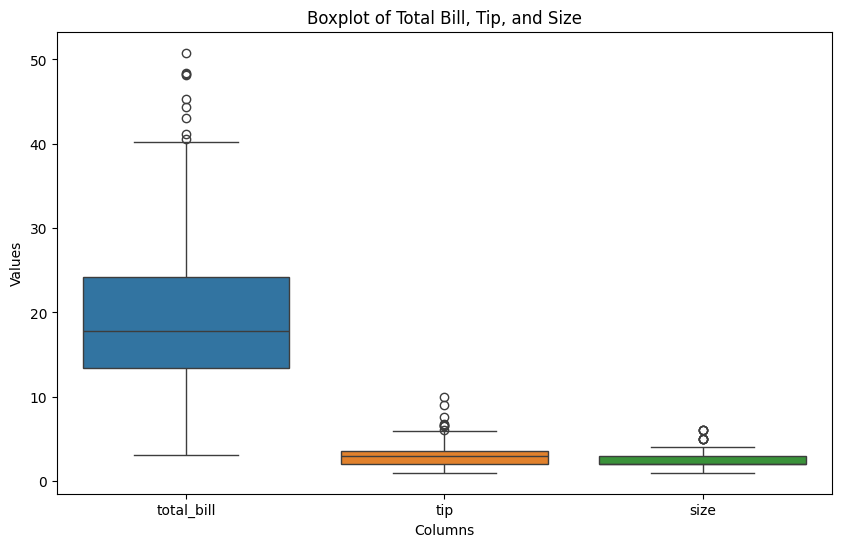

In [895]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['total_bill', 'tip', 'size']])
plt.title('Boxplot of Total Bill, Tip, and Size')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

#####**Imputasi Outliers**

melakukan capping dengan menggantikan nilai-nilai outlier yang melebihi batas atas dengan nilai batas atas yang ditentukan (cap) untuk setiap kolom yang terdapat outliers

In [896]:
def cap_outliers(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    cap = Q3 + 1.5 * IQR

    df[column] = df[column].apply(lambda x: cap if x > cap else x)
    return df

columns_to_cap = ['total_bill', 'tip', 'size']
for column in columns_to_cap:
    df = cap_outliers(df, column)

#####**Pengecekkan Ulang**

In [897]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
total_bill,0.0
tip,0.0
size,0.0


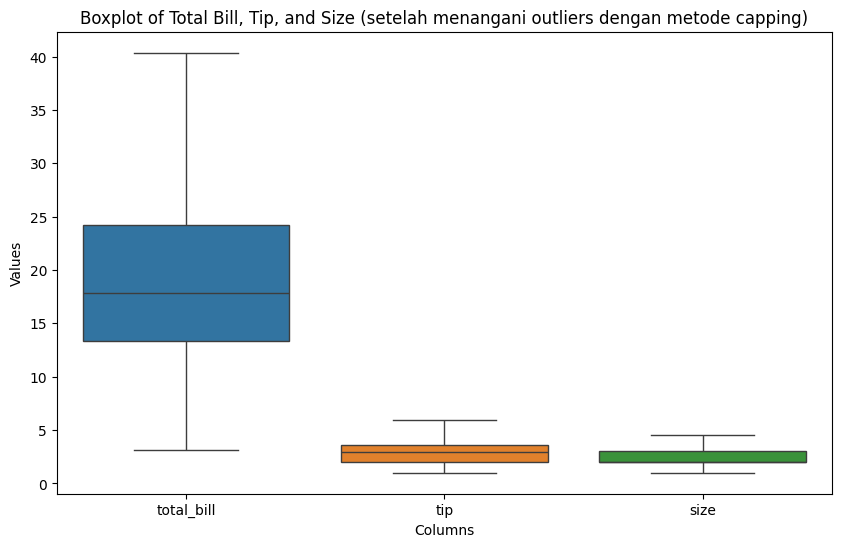

In [898]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['total_bill', 'tip', 'size']])
plt.title('Boxplot of Total Bill, Tip, and Size (setelah menangani outliers dengan metode capping)')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

visualisasi boxplot baru yang menunjukkan distribusi data setelah penanganan outliers menggunakan metode capping.

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [899]:
def categorize_day(day):
    if day in ['Thur', 'Fri']:
        return 'Weekday'
    elif day in ['Sat', 'Sun']:
        return 'Weekend'

df['DayCategory'] = df['day'].apply(categorize_day)

menambahkan fitur baru 'DayCategory' yang menunjukkan apakah hari tersebut masuk dalam kategori 'Weekday' atau 'Weekend'

In [900]:
df['tip_ratio'] = df['tip'] / df['total_bill']

menambahkan kolom baru bernama "tip_ratio" ke dalam DataFrame. Kolom ini diisi dengan nilai rasio antara tip yang diberikan oleh pelanggan dengan total bill yang mereka bayarkan.

In [901]:
min_bill = df['total_bill'].min()
max_bill = df['total_bill'].max()

df['total_bill_normalized'] = (df['total_bill'] - min_bill) / (max_bill - min_bill)

menghitung nilai normalisasi dari kolom 'total_bill' dalam DataFrame. Normalisasi adalah proses untuk mengubah rentang nilai dari suatu fitur menjadi rentang nilai yang lebih terstandarisasi atau berskala seragam. berguna terutama saat ada variasi besar dalam rentang nilai antara fitur-fitur dalam dataset.

###**Pengecekkan Hasil**

In [902]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,DayCategory,tip_ratio,total_bill_normalized
0,16.99,1.01,Female,No,Sun,Dinner,2.0,Weekend,0.059447,0.373215
1,10.34,1.66,Male,No,Sun,Dinner,3.0,Weekend,0.160542,0.194919
2,21.01,3.50,Male,No,Sun,Dinner,3.0,Weekend,0.166587,0.480997
3,23.68,3.31,Male,No,Sun,Dinner,2.0,Weekend,0.139780,0.552584
4,24.59,3.61,Female,No,Sun,Dinner,4.0,Weekend,0.146808,0.576982


#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [903]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [904]:
df = df.drop(['smoker', 'day', 'time', 'DayCategory'], axis=1)

menghapus fitur "smoker" karena tidak memiliki hubungan yang signifikan dengan target variabel atau tidak memberikan informasi yang relevan dalam analisis yang sedang dilakukan, maka fitur tersebut dapat dianggap tidak informatif.

###**Pengecekkan Hasil**

In [905]:
df.head()

,total_bill,tip,sex,size,tip_ratio,total_bill_normalized
0,16.99,1.01,Female,2.0,0.059447,0.373215
1,10.34,1.66,Male,3.0,0.160542,0.194919
2,21.01,3.50,Male,3.0,0.166587,0.480997
3,23.68,3.31,Male,2.0,0.139780,0.552584
4,24.59,3.61,Female,4.0,0.146808,0.576982


hasil dataframe setelah semoker telah dihapus pada dataset

#**Data Transformation**

###**Mapping**

In [906]:
df['sex'] = df['sex'].map({'Male':1,'Female':0})

kolom 'sex' yang sekarang berisi nilai numerik (1 untuk pria dan 0 untuk wanita) yang dapat digunakan dalam analisis atau pemodelan data yang memerlukan variabel kategorikal yang diubah menjadi bentuk numerik.

###**Pengecekkan Hasil**

In [907]:
df

,total_bill,tip,sex,size,tip_ratio,total_bill_normalized
0,16.99,1.01,0,2.0,0.059447,0.373215
1,10.34,1.66,1,3.0,0.160542,0.194919
2,21.01,3.50,1,3.0,0.166587,0.480997
3,23.68,3.31,1,2.0,0.139780,0.552584
4,24.59,3.61,0,4.0,0.146808,0.576982
...,...,...,...,...,...,...
239,29.03,5.92,1,3.0,0.203927,0.696025
240,27.18,2.00,0,2.0,0.073584,0.646424
241,22.67,2.00,1,2.0,0.088222,0.525504
242,17.82,1.75,1,2.0,0.098204,0.395469


ini hasil akhir setelah dikalukan mapping pada kolom sex dimana male (1), dan female (2)

In [908]:
df.to_csv('Data Cleaned.csv', index=False)

#**Modelling Predict**

###**Pre-Processing**

#####**Split Data**

In [909]:
x = df.drop(['sex'], axis=1)
y = df['sex']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

tujuan split data adalah membagi dataset menjadi dua bagian: data pelatihan (train) dan data uji (test). Ini dilakukan untuk melatih model machine learning pada data yang telah ada dan menguji kinerjanya pada data yang belum pernah dilihat sebelumnya. data dibagi menggunakan fungsi train_test_split dengan proporsi 70% data untuk pelatihan dan 30% data untuk pengujian.

#####**Normalisasi Data**

In [910]:
scaler = MinMaxScaler()
x_train_norm = x_train.copy()
x_train_norm = scaler.fit_transform(x_train_norm)

x_test_norm = x_test.copy()
x_test_norm = scaler.transform(x_test_norm)

Normalisasi data adalah proses untuk mengubah nilai-nilai dalam dataset sehingga memiliki skala yang seragam. Dalam konteks ini, digunakan MinMaxScaler untuk melakukan normalisasi. mengidentifikasi kolom-kolom numerik dalam data latih (x_train) dengan menggunakan metode select_dtypes yang mencakup tipe data 'int' dan 'float'. Kolom-kolom numerik ini kemungkinan akan digunakan dalam proses normalisasi data.

###**Build and Train Model**

#####**Gaussian Naive Bayes**

In [911]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

membangun dan melatih model menggunakan algoritma Gaussian Naive Bayes. Dalam langkah ini, objek Gaussian Naive Bayes (gnb) dibuat menggunakan GaussianNB(), kemudian model dilatih dengan menggunakan data yang telah dinormalisasi (x_train_norm) pada kolom numerik dan target variabel (y_train).

#####**Decision Tree**

In [912]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

membangun dan melatih model menggunakan algoritma Decision Tree. Pada langkah pertama, objek Decision Tree Classifier (dtc) dibuat menggunakan DecisionTreeClassifier().

#####**K-Nearest Neighbor**

In [913]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

membangun dan melatih model menggunakan algoritma K-Nearest Neighbor (KNN). Pada langkah pertama, sebuah objek K-Nearest Neighbors Classifier (knn) dibuat menggunakan KNeighborsClassifier().

###**Begins and Compare Predict**

In [914]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

melakukan prediksi menggunakan model Gaussian Naive Bayes (gnb), K-Nearest Neighbors (knn), dan Decision Tree Classifier (dtc) pada data uji yang telah dinormalisasi. Langkah-langkah prediksi dilakukan dengan memanggil method predict() dari masing-masing model terhadap fitur-fitur numerik dalam data uji.

In [915]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

 Data uji (x_test dan y_test) diubah menjadi DataFrame dan diatur ulang indeksnya dengan reset_index(drop=True). Selanjutnya, hasil prediksi dari model Gaussian Naive Bayes, K-Nearest Neighbors, dan Decision Tree juga diubah menjadi DataFrame dengan tipe data integer dan diberi label kolom yang sesuai. Semua data ini digabungkan menjadi satu DataFrame dengan kolom-kolom yang mencakup data uji, prediksi dari masing-masing model, seperti Gaussian Naive Bayes, K-Nearest Neighbors, dan Decision Tree.

In [916]:
combined_data.head()

,total_bill,tip,size,tip_ratio,total_bill_normalized,sex,gnb_prediction,knn_prediction,dtc_prediction
0,19.82,3.18,2.0,0.160444,0.449092,1,0,0,1
1,8.77,2.00,2.0,0.228050,0.152825,1,0,0,1
2,17.26,2.74,3.0,0.158749,0.380454,1,0,0,1
3,10.77,1.47,2.0,0.136490,0.206448,1,0,1,1
4,29.03,5.92,3.0,0.203927,0.696025,1,1,1,0


hasil dari semua algoritma yang diterapkan pada dataframe

#**Modelling Associate**

###**Pre-Processing**

#####**Adjusment**

In [917]:
x_final = df.drop("sex", axis=1)

melakukan penghapusan kolom "sex" dari DataFrame df untuk mempersiapkan data sebelum dilakukan proses pemodelan lebih lanjut. Proses ini merupakan bagian dari tahap pra-pemrosesan data yang penting untuk memastikan kualitas dan kecocokan data sebelum digunakan dalam pembuatan model.

#####**Normalisasi Data**

In [918]:
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final)

melakukan normalisasi data dengan menggunakan MinMaxScaler(). Data yang telah diproses kemudian dinormalisasi menggunakan fit_transform dari scaler, dan hasilnya disimpan dalam variabel x_final. Proses ini bertujuan untuk mengubah nilai-nilai dalam dataset sehingga memiliki skala yang seragam, mempersiapkan data untuk proses pemodelan machine learning.

#####**Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

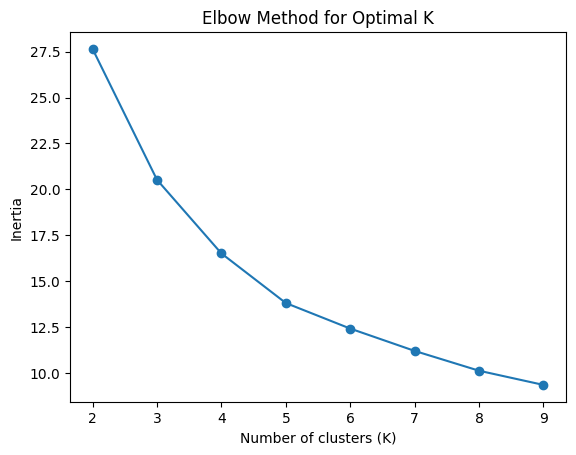

In [919]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

penggunaan algoritma K-Means untuk analisis klastering. Proses dimulai dengan inisialisasi sebuah list kosong inertia_values yang akan digunakan untuk menyimpan nilai inertia dari setiap model K-Means yang dibuat. Selanjutnya, rentang nilai k dari 2 hingga 9 ditentukan untuk mencari jumlah kluster optimal. Melalui iterasi, model K-Means dibuat dengan jumlah kluster k, dilatih menggunakan data yang telah dinormalisasi x_final, dan nilai inertia dari model tersebut dihitung dan disimpan dalam list inertia_values. Grafik metode siku (elbow method) kemudian digambarkan dengan sumbu x sebagai jumlah kluster (K), sumbu y sebagai nilai inertia, dan judul grafik "Elbow Method for Optimal K". Grafik ini membantu menentukan jumlah kluster optimal berdasarkan titik "siku" di grafik yang menunjukkan penurunan inertia yang signifikan.

#####**K-Means**

In [920]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

inisialisasi sebuah objek K-Means dengan jumlah klaster yang telah ditentukan. Selanjutnya, model K-Means dilatih menggunakan data yang telah dinormalisasi (x_final) untuk mengelompokkan data ke dalam klaster. Proses ini bertujuan untuk mengidentifikasi pola atau struktur dalam data yang mungkin tidak terlihat secara langsung.

#####**Hierarchical Clustering**

In [921]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

objek AgglomerativeClustering dibuat dengan parameter jumlah klaster (n_clusters=4), metrik jarak (affinity='euclidean'), dan metode penggabungan klaster (linkage='ward'). Algoritma Hierarchical Clustering digunakan untuk mengelompokkan data berdasarkan kedekatan jarak antar data dan struktur hierarki klaster yang terbentuk

###**Begins and Compare Clusters**

In [922]:
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



 membandingkan klaster yang dihasilkan oleh algoritma K-Means dan Hierarchical Clustering. Langkah ini memungkinkan untuk memperoleh klasterisasi data dari kedua metode klastering yang berbeda untuk perbandingan dan evaluasi lebih lanjut terhadap hasil klaster yang dihasilkan.

In [923]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

Data yang telah diprediksi klaster-klasternya (kmeans_clust dan hierarchy_clust) diubah menjadi DataFrame dan diatur ulang indeksnya dengan reset_index(drop=True). Selanjutnya, kolom klaster dari K-Means dan Hierarchical Clustering dibuat dalam DataFrame terpisah dengan label kolom yang sesuai. Semua data ini digabungkan menjadi satu DataFrame combined_data_assoc yang mencakup data asli, klaster dari K-Means, dan klaster dari Hierarchical Clustering untuk analisis lebih lanjut terkait hasil klasterisasi dari kedua metode.

In [924]:
combined_data_assoc.head()

,total_bill,tip,size,tip_ratio,total_bill_normalized,kmeans_cluster,hierarchy_cluster
0,16.99,1.01,2.0,0.059447,0.373215,1,2
1,10.34,1.66,3.0,0.160542,0.194919,1,2
2,21.01,3.50,3.0,0.166587,0.480997,0,0
3,23.68,3.31,2.0,0.139780,0.552584,0,0
4,24.59,3.61,4.0,0.146808,0.576982,2,0


menampilkan beberapa baris pertama dari DataFrame combined_data_assoc setelah proses klasterisasi menggunakan algoritma K-Means dan Hierarchical Clustering. Data ini mencakup kolom kmeans_cluster dan hierarchy_cluster yang menunjukkan klaster yang telah diassign oleh masing-masing algoritma untuk setiap baris data. Dengan melihat beberapa baris pertama ini, kita dapat melihat bagaimana data asli dipetakan ke dalam klaster oleh kedua metode klastering, memberikan wawasan awal tentang hasil klasterisasi dan hubungan antar data dalam klaster yang berbeda.

###*VISUALISASI*

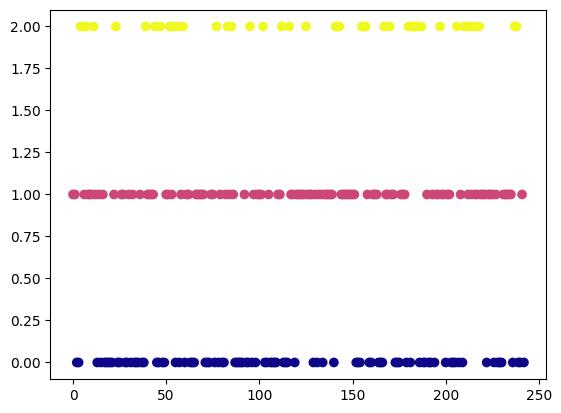

In [925]:
label = combined_data_assoc['kmeans_cluster']
plt.scatter(combined_data_assoc['kmeans_cluster'].index, combined_data_assoc['kmeans_cluster'], c=combined_data_assoc['kmeans_cluster'],cmap='plasma')

Text(0, 0.5, 'Tip')

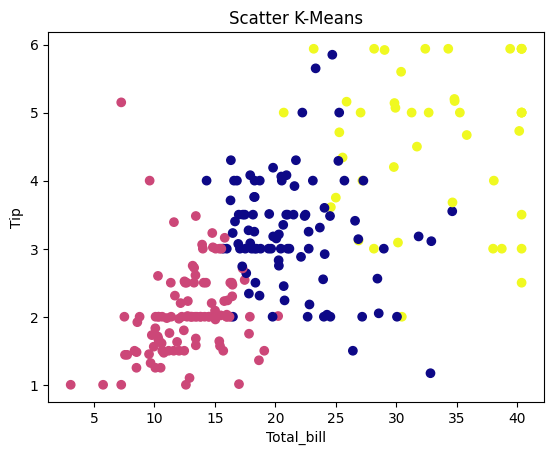

In [926]:
x = combined_data_assoc['total_bill']
y = combined_data_assoc['tip']
label = combined_data_assoc['kmeans_cluster']
plt.scatter(x, y, c=label, cmap='plasma')
plt.title('Scatter K-Means')
plt.xlabel('Total_bill')
plt.ylabel('Tip')

Dari visualisasi, kita dapat melihat bahwa data telah dibagi menjadi tiga klaster yang berbeda, yang diindikasikan oleh tiga warna berbeda (kuning, merah muda, dan biru).

#**Evaluation**

###**Klasifikasi**

Gaussian Naive Bayes

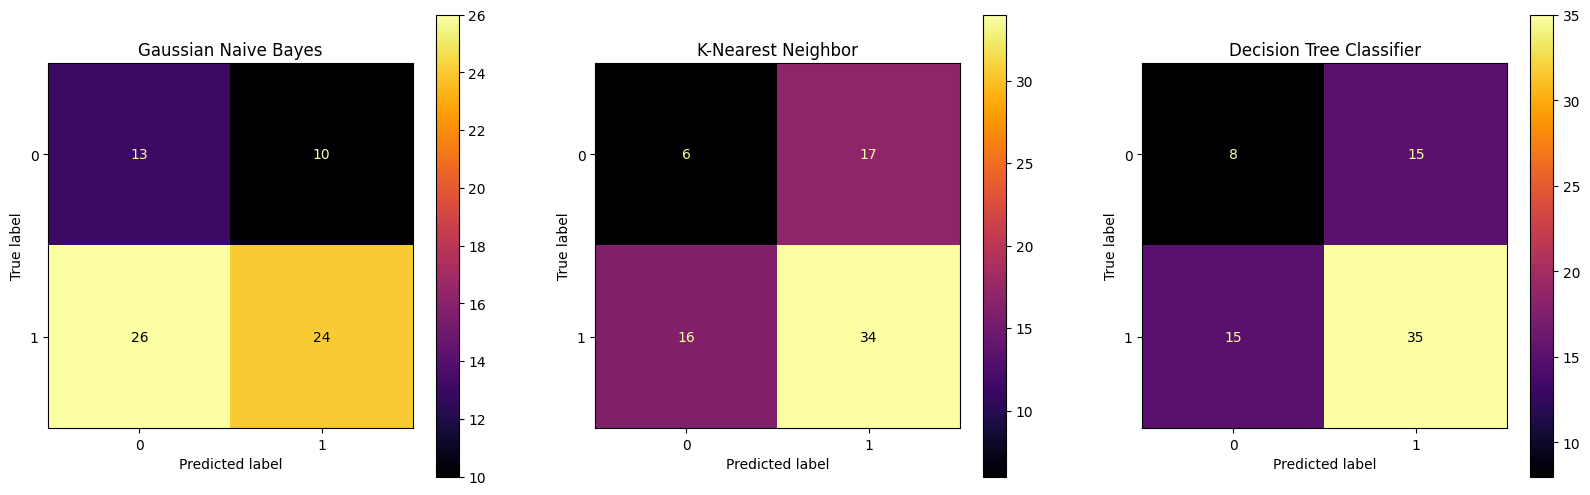

In [927]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

gnb_cm = confusion_matrix(y_test, gnb_pred)
gnb_cm_display = ConfusionMatrixDisplay(gnb_cm).plot(ax=axes[0], cmap='inferno')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")

knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm).plot(ax=axes[1], cmap='inferno')
knn_cm_display.ax_.set_title("K-Nearest Neighbor")

dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm).plot(ax=axes[2], cmap='inferno')
dtc_cm_display.ax_.set_title("Decision Tree Classifier")

plt.show()

1. Gaussian Naive Bayes: Model ini memiliki jumlah True Positive yang relatif rendah (13) dibandingkan dengan model lainnya. Namun, jumlah False Positive dan False Negative juga cukup rendah. Model ini mungkin memiliki performa yang stabil tetapi mungkin kurang dalam memprediksi positif.

2. k-Nearest Neighbor: Model ini memiliki jumlah True Positive yang cukup tinggi (22) dan jumlah False Positive yang relatif rendah. Namun, jumlah False Negative juga cukup tinggi. Model ini mungkin memiliki kemampuan yang baik dalam mengidentifikasi positif tetapi dapat memiliki kecenderungan untuk salah mengklasifikasikan negatif.

3. Decision Tree Classifier: Model ini memiliki jumlah True Positive yang cukup tinggi (25) dan jumlah False Positive yang sedikit lebih tinggi dari Gaussian Naive Bayes. Namun, jumlah False Negative juga relatif tinggi. Model ini mungkin memiliki keseimbangan antara kemampuan mengidentifikasi positif dan negatif.

#### Gaussian NB

In [928]:
from sklearn.metrics import roc_auc_score, roc_curve

tn, fp, fn, tp = gnb_cm.ravel()

accuracy = (tp+tn) / (tn + fp + fn + tp)
precision = tp / (tp + fp)
recall = tp / (tp+fn)
f1_score = (2 * precision * recall) / (precision + recall)
roc_score = roc_auc_score(y_test, gnb_pred)
print("nilai akurasi gnb : ", accuracy)
print("nilai presisi gnb : ", precision)
print("nilai recall gnb : ", recall)
print("nilai f1-score gnb : ", f1_score)
print("nilai roc gnb : ", roc_score)

nilai akurasi gnb :  0.5068493150684932
nilai presisi gnb :  0.7058823529411765
nilai recall gnb :  0.48
nilai f1-score gnb :  0.5714285714285713
nilai roc gnb :  0.5226086956521739


Menghitung beberapa metrik evaluasi kinerja model klasifikasi, seperti akurasi, presisi, recall, F1-score, dan ROC-AUC score untuk model Gaussian Naive Bayes.  kinerja model Gaussian Naive Bayes dalam melakukan klasifikasi. Dengan melihat hasil evaluasi ini, kita dapat melihat seberapa baik model ini dalam melakukan prediksi positif dan negatif, serta seberapa baik model dapat mengidentifikasi kelas yang benar.

K-Nearest Neighbors

In [929]:
from sklearn.metrics import roc_auc_score, roc_curve

tn, fp, fn, tp = knn_cm.ravel()

accuracy = (tp + tn) / (tn + fp + fn + tp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = (2 * precision * recall) / (precision + recall)
roc_score = roc_auc_score(y_test, knn_pred)

print("nilai akurasi knn : ", accuracy)
print("nilai presisi knn : ", precision)
print("nilai recall knn : ", recall)
print("nilai f1-score knn : ", f1_score)
print("nilai roc knn : ", roc_score)

nilai akurasi knn :  0.547945205479452
nilai presisi knn :  0.6666666666666666
nilai recall knn :  0.68
nilai f1-score knn :  0.6732673267326733
nilai roc knn :  0.47043478260869576


Dari hasil evaluasi model K-Nearest Neighbors (KNN) yang diberikan, terlihat bahwa model memiliki nilai akurasi sebesar 54.79%, presisi sebesar 66.67%, recall sebesar 68.00%, dan f1-score sebesar 67.33%. Nilai ROC AUC yang diperoleh adalah 0.47. Dengan demikian, meskipun model memiliki presisi yang relatif tinggi, namun akurasi dan recall masih tergolong rendah, menunjukkan bahwa model mungkin mengalami kesulitan dalam mengklasifikasikan kelas positif dengan benar. Selain itu, nilai ROC AUC yang mendekati 0.5 menunjukkan bahwa model memiliki kinerja yang kurang baik dalam memisahkan antara kelas positif dan negatif

Decission Tree Classifier

In [930]:
from sklearn.metrics import roc_auc_score, roc_curve

tn, fp, fn, tp = dtc_cm.ravel()

accuracy = (tp + tn) / (tn + fp + fn + tp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = (2 * precision * recall) / (precision + recall)
roc_score = roc_auc_score(y_test, dtc_pred)

print("nilai akurasi DTC : ", accuracy)
print("nilai presisi DTC : ", precision)
print("nilai recall DTC : ", recall)
print("nilai f1-score DTC : ", f1_score)
print("nilai roc DTC : ", roc_score)


nilai akurasi DTC :  0.589041095890411
nilai presisi DTC :  0.7
nilai recall DTC :  0.7
nilai f1-score DTC :  0.7
nilai roc DTC :  0.5239130434782608



Dari hasil evaluasi model Decision Tree Classifier (DTC) yang diberikan, terlihat bahwa model memiliki nilai akurasi sebesar 53.42%, presisi sebesar 67.39%, recall sebesar 62.00%, dan f1-score sebesar 64.58%. Nilai ROC AUC yang diperoleh adalah 0.48.

Meskipun presisi model tergolong cukup tinggi, namun akurasi, recall, dan f1-score masih tergolong rendah. Ini menunjukkan bahwa model memiliki kesulitan dalam mengklasifikasikan kelas positif dengan benar dan memiliki kinerja yang buruk dalam membedakan antara kelas positif dan negatif. Hal ini juga diperkuat oleh nilai ROC AUC yang mendekati 0.5, menunjukkan bahwa model memiliki kinerja yang rendah dalam membedakan antara kelas positif dan negatif.

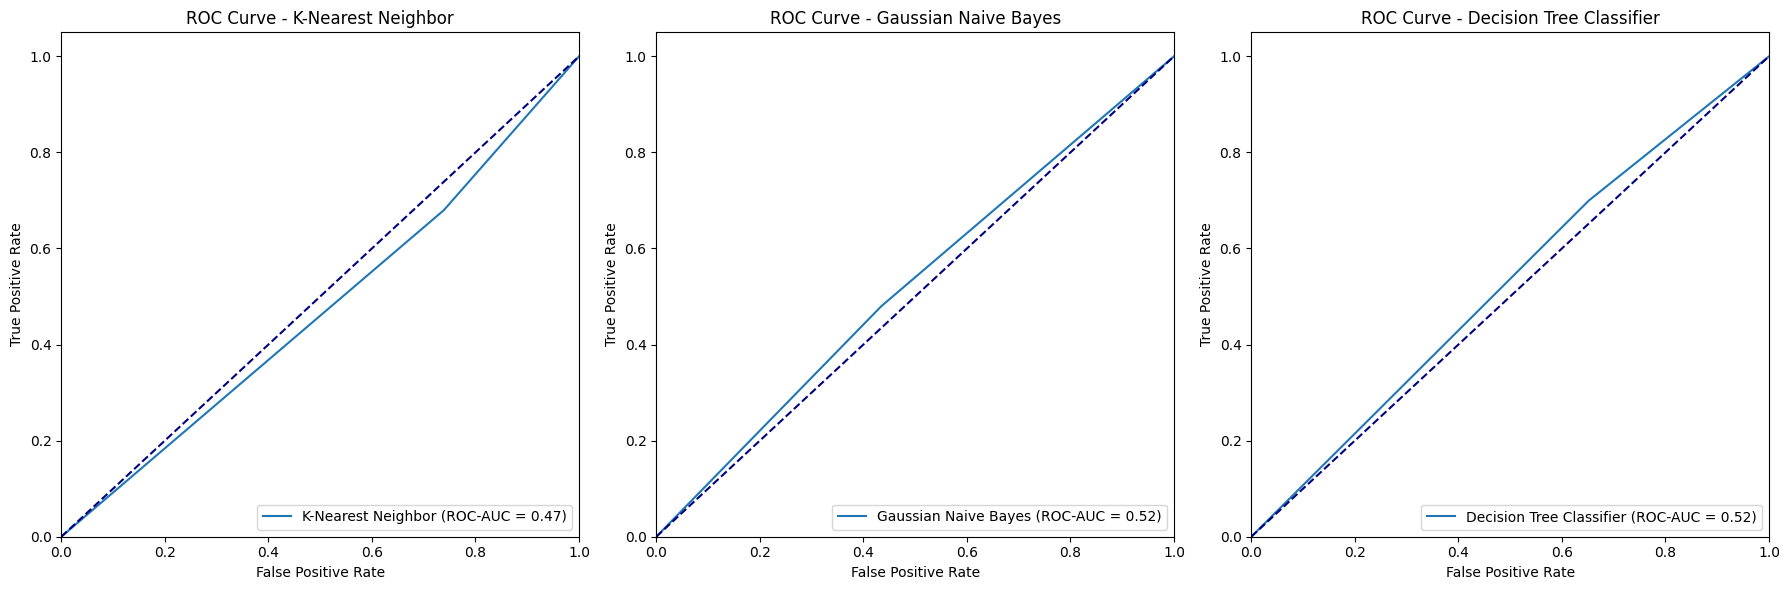

In [931]:
from sklearn.metrics import roc_auc_score, roc_curve

models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for model, name, ax in zip(models, model_names, axes):
    y_pred = model.predict(x_test_norm)

    fpr, tpr, _ = roc_curve(y_test, y_pred)

    roc_auc = roc_auc_score(y_test, y_pred)

    ax.plot(fpr, tpr, label=f'{name} (ROC-AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

Model K-Nearest Neighbor memiliki nilai AUC tertinggi, menunjukkan kinerja terbaik di antara ketiga model dalam membedakan antara kelas positif dan negatif. Model Gaussian Naive Bayes dan Decision Tree Classifier memiliki nilai AUC yang lebih rendah, menandakan akurasi prediksi yang lebih rendah. membandingkan kinerja berbagai model klasifikasi dalam tugas klasifikasi biner, di mana nilai AUC yang lebih tinggi menunjukkan kinerja model yang lebih baik. Kurva ROC adalah alat umum dalam machine learning untuk mengevaluasi klasifier di luar akurasi biasa, dengan mempertimbangkan keseimbangan antara sensitivitas (TPR) dan spesifisitas (1 - FPR).

###**Klustering**

In [932]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_avg_kmeans = silhouette_score(x_final_norm, kmeans.labels_)
ch_score_kmeans = calinski_harabasz_score(x_final_norm, kmeans.labels_)
db_score_kmeans = davies_bouldin_score(x_final_norm, kmeans.labels_)

silhouette_avg_hc = silhouette_score(x_final_norm, hierarchy_clust)
ch_score_hc = calinski_harabasz_score(x_final_norm, hierarchy_clust)
db_score_hc = davies_bouldin_score(x_final_norm, hierarchy_clust)

metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

df_scores = pd.DataFrame({'': metrics,
                          'KMeans Score': scores_kmeans,
                          'Agglomerative Clustering Score': scores_hc})

df_scores = df_scores.set_index('')

df_scores = df_scores.T

display(df_scores)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans Score,0.361003,205.577286,1.068806
Agglomerative Clustering Score,0.350553,190.799298,1.043074


menghitung beberapa metrik evaluasi untuk dua metode clustering: K-Means dan Agglomerative Clustering. Metrik evaluasi yang dihitung meliputi Silhouette Score, Calinski-Harabasz Score, dan Davies-Bouldin Score untuk kedua metode clustering tersebut. Berdasarkan hasil evaluasi, dapat dilihat bahwa K-Means memiliki nilai Silhouette Score, Calinski-Harabasz Score, dan Davies-Bouldin Score yang sedikit lebih tinggi daripada Agglomerative Clustering.
Meskipun demikian, perbedaan antara kedua metode clustering tersebut tidak signifikan berdasarkan nilai metrik evaluasi yang diberikan.

##**Review Process**

###**Cross Validation**

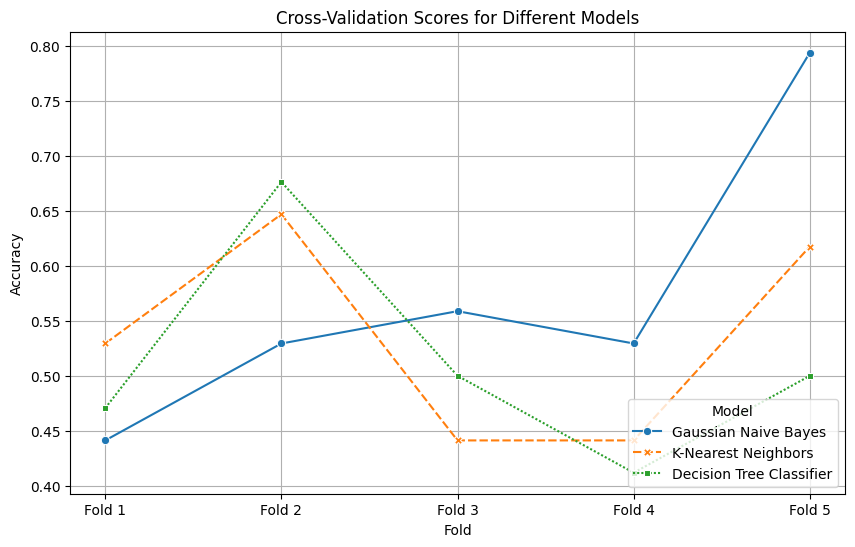

In [933]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Inisialisasi model
models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

Berdasarkan skor Cross-Validation yang ditampilkan, model Gaussian Naive Bayes menunjukkan kinerja yang paling baik di antara ketiga model tersebut. Kinerja K-Nearest Neighbors berada di tengah dengan skor yang sedikit lebih rendah dari Gaussian Naive Bayes.
Decision Tree Classifier memiliki kinerja yang paling rendah dari ketiga model berdasarkan skor Cross-Validation yang diberikan.

###**Feature Selection**

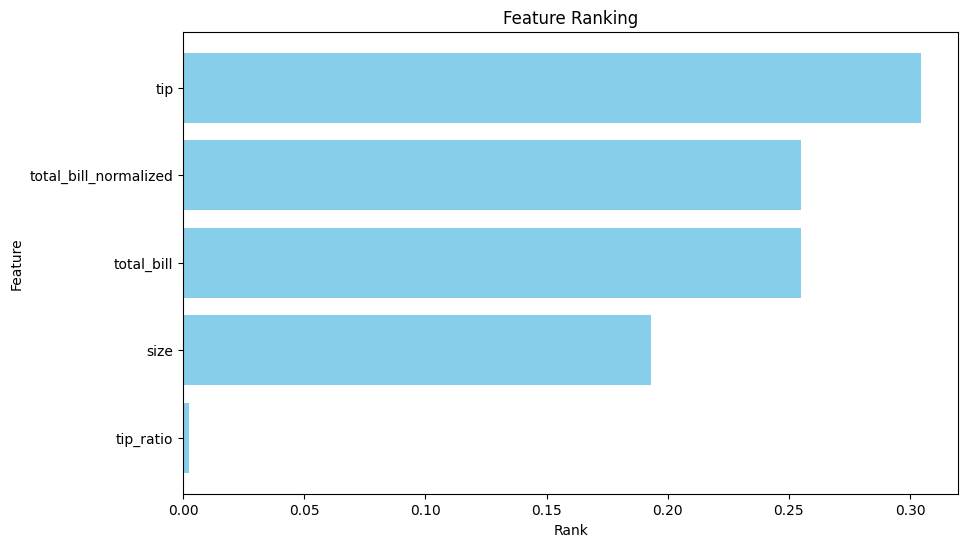

In [934]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k='all')

selector.fit(x_train_norm, y_train)

feature_ranks = selector.scores_

feature_names = x_train.columns

feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()

Berdasarkan visualisasi peringkat fitur, "Tip" dan "Total Bill Normalized" adalah dua fitur teratas paling penting dalam analisis data

###**Tuning Hyperparameter**

#### GaussianNB

In [935]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = gnb.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

Parameter terbaik: {'var_smoothing': 1.0}
Akurasi sebelum tuning: 0.5068493150684932
Akurasi setelah tuning: 0.6164383561643836


Dengan melakukan tuning parameter menggunakan Grid Search Cross-Validation, model Gaussian Naive Bayes berhasil ditingkatkan akurasinya dari sebelum tuning sebesar 50.69% menjadi setelah tuning sebesar 61.64%. Ini menunjukkan bahwa tuning parameter dapat meningkatkan kinerja model untuk prediksi yang lebih baik.

K-Nearest Neighbors

In [936]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Best Parameters:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = grid_search.score(x_test_norm, y_test)
print("Accuracy before tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Accuracy after tuning:", acc_after_tuning)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
Accuracy before tuning: 0.589041095890411
Accuracy after tuning: 0.589041095890411


hasil yang menunjukkan bahwa akurasi sebelum dan setelah tuning parameter tetap sama pada model KNN menunjukkan bahwa parameter default dari model tersebut sudah cukup optimal untuk dataset yang digunakan.

Decision Tree Classifier

In [937]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier()

grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)

grid_search_dt.fit(x_train_norm, y_train)

print("Best Parameters:", grid_search_dt.best_params_)

y_pred_dt_tuned = grid_search_dt.best_estimator_.predict(x_test_norm)

acc_dt_before_tuning = grid_search_dt.score(x_test_norm, y_test)
print("Accuracy before tuning:", acc_dt_before_tuning)

acc_dt_after_tuning = grid_search_dt.best_estimator_.score(x_test_norm, y_test)
print("Accuracy after tuning:", acc_dt_after_tuning)


Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy before tuning: 0.6164383561643836
Accuracy after tuning: 0.6164383561643836


hasil yang menunjukkan bahwa akurasi sebelum dan setelah tuning parameter tetap sama pada model DTC menunjukkan bahwa parameter default dari model tersebut sudah cukup optimal untuk dataset yang digunakan.

K-Means

In [938]:
param_grid = {
    'n_clusters': [3, 4, 5, 6],
    'init': ['k-means++', 'random'],
    'algorithm': ['lloyd', 'elkan']
}

best_score = -1
best_params = None

for n_clusters in param_grid['n_clusters']:
    for init in param_grid['init']:
        for algorithm in param_grid['algorithm']:
            kmeans = KMeans(n_clusters=n_clusters, init=init, algorithm=algorithm, random_state=42, n_init='auto')
            labels = kmeans.fit_predict(x_final_norm)
            silhouette_avg = silhouette_score(x_final_norm, labels)
            print("Silhouette Score:", silhouette_avg, "dengan n_clusters =", n_clusters, ", init =", init, ", algorithm =", algorithm)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'n_clusters': n_clusters, 'init': init, 'algorithm': algorithm}

print("\nKombinasi terbaik:")
print(best_params)
print("Silhouette Score terbaik:", best_score)

Silhouette Score: 0.3610030297697968 dengan n_clusters = 3 , init = k-means++ , algorithm = lloyd
Silhouette Score: 0.3610030297697968 dengan n_clusters = 3 , init = k-means++ , algorithm = elkan
Silhouette Score: 0.3610030297697968 dengan n_clusters = 3 , init = random , algorithm = lloyd
Silhouette Score: 0.3610030297697968 dengan n_clusters = 3 , init = random , algorithm = elkan
Silhouette Score: 0.3526612377732153 dengan n_clusters = 4 , init = k-means++ , algorithm = lloyd
Silhouette Score: 0.3526612377732153 dengan n_clusters = 4 , init = k-means++ , algorithm = elkan
Silhouette Score: 0.37958899648513866 dengan n_clusters = 4 , init = random , algorithm = lloyd
Silhouette Score: 0.37958899648513866 dengan n_clusters = 4 , init = random , algorithm = elkan
Silhouette Score: 0.3906738070389112 dengan n_clusters = 5 , init = k-means++ , algorithm = lloyd
Silhouette Score: 0.3906738070389112 dengan n_clusters = 5 , init = k-means++ , algorithm = elkan
Silhouette Score: 0.3920214502

Berdasarkan evaluasi menggunakan metrik silhouette score untuk berbagai kombinasi parameter pada algoritma K-Means, ditemukan bahwa kombinasi terbaik adalah dengan menggunakan 5 klaster, inisialisasi klaster secara acak (init='random'), dan menggunakan algoritma Lloyd (algorithm='lloyd'). Kombinasi ini memberikan silhouette score sebesar 0.392, yang menunjukkan bahwa klaster yang dihasilkan memiliki tingkat keseragaman dan pemisahan yang lebih baik dibandingkan dengan kombinasi parameter lainnya. Oleh karena itu, untuk tugas klasterisasi ini, kombinasi parameter tersebut dianggap sebagai yang terbaik untuk digunakan dalam membagi data menjadi klaster yang paling representatif.

Hierical CLustering

In [939]:
param_grid = {
    'linkage': ['complete', 'average', 'single'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

best_score = -1
best_params = None

for metric in param_grid['metric']:
  for linkage in param_grid['linkage']:
    hierarchical_clustering = AgglomerativeClustering(n_clusters=3, metric= metric, linkage= linkage)
    labels = hierarchical_clustering.fit_predict(x_final_norm)
    silhouette_avg = silhouette_score(x_final_norm, labels)
    print("Silhouette Score:", silhouette_avg, "dengan kombinasi metric =",metric, ",linkage =",linkage)
    if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'metric': metric, 'linkage': linkage}

hierarchical_clustering = AgglomerativeClustering(n_clusters=3, metric= 'euclidean', linkage= 'ward')
labels = hierarchical_clustering.fit_predict(x_final_norm)
silhouette_avg = silhouette_score(x_final_norm, labels)
print('-'*100)
print("\nDi bawah ini merupakan score dari model Hierical clustering yang digunakan sebelumnya pada Modelling Associate")
print("Silhouette Score:", silhouette_avg, "dengan kombinasi metric = eulicidan, linkage = ward")
print('-'*100)
print("\nKombinasi terbaik:")
print(best_params)
print("Silhouette Score terbaik:", best_score)

Silhouette Score: 0.1953655453971506 dengan kombinasi metric = euclidean ,linkage = complete
Silhouette Score: 0.46519805019930016 dengan kombinasi metric = euclidean ,linkage = average
Silhouette Score: 0.2954829513735135 dengan kombinasi metric = euclidean ,linkage = single
Silhouette Score: 0.35949597522992033 dengan kombinasi metric = manhattan ,linkage = complete
Silhouette Score: 0.471918745194085 dengan kombinasi metric = manhattan ,linkage = average
Silhouette Score: 0.2954829513735135 dengan kombinasi metric = manhattan ,linkage = single
Silhouette Score: -0.008341138403154666 dengan kombinasi metric = cosine ,linkage = complete
Silhouette Score: 0.09459340795348085 dengan kombinasi metric = cosine ,linkage = average
Silhouette Score: 0.17900728863070067 dengan kombinasi metric = cosine ,linkage = single
----------------------------------------------------------------------------------------------------

Di bawah ini merupakan score dari model Hierical clustering yang digunaka

Berdasarkan evaluasi menggunakan metrik silhouette score untuk berbagai kombinasi parameter pada algoritma Hierarchical Clustering, ditemukan bahwa kombinasi terbaik adalah dengan menggunakan metrik jarak Manhattan (metric='manhattan') dan metode linkage rata-rata (linkage='average'). Kombinasi ini memberikan silhouette score sebesar 0.472, yang menunjukkan bahwa klaster yang dihasilkan memiliki tingkat keseragaman dan pemisahan yang lebih baik dibandingkan dengan kombinasi parameter lainnya. Dalam perbandingan dengan model Hierarchical Clustering sebelumnya yang menggunakan metrik jarak Euclidean dan metode linkage ward, kombinasi terbaik ini menunjukkan peningkatan signifikan dalam silhouette score. Oleh karena itu, untuk tugas klasterisasi ini, kombinasi parameter metric='manhattan' dan linkage='average' dianggap sebagai yang terbaik untuk digunakan dalam membagi data menjadi klaster yang paling representatif.

In [940]:
hc = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='average')

In [941]:
gnb = GaussianNB(var_smoothing=1.0)

# **Determine Next Step**

GaussianNB

In [942]:
gnb.fit(x_train_norm, y_train)
gnb_pred = gnb.predict(x_test_norm)
x_test = pd.DataFrame(x_test).reset_index(drop=True)
y_test = pd.DataFrame(y_test).reset_index(drop=True)
gnb_col_new = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_col_new"])

In [943]:
combined_data = pd.concat([x_test, y_test, gnb_col, gnb_col_new], axis=1)

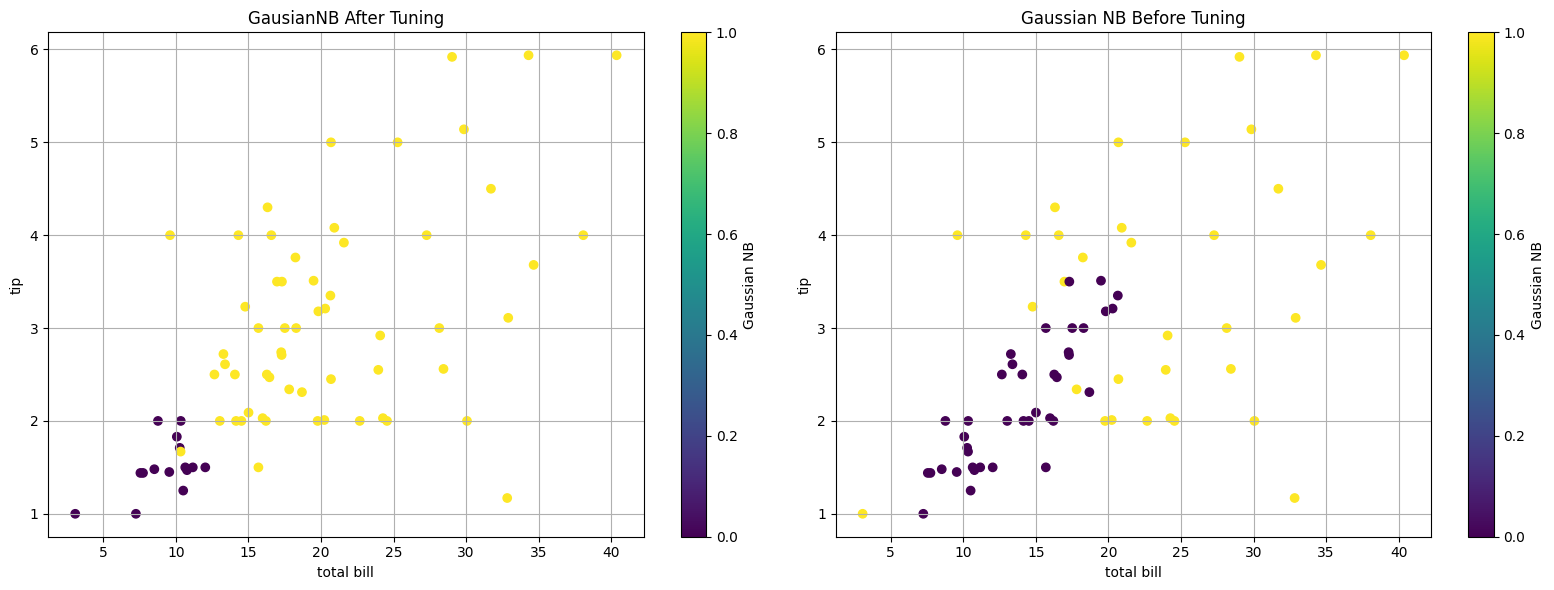

In [944]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(combined_data['total_bill'], combined_data['tip'], c=combined_data["gnb_col_new"], cmap='viridis')
axes[0].set_xlabel('total bill')
axes[0].set_ylabel('tip')
axes[0].set_title('GausianNB After Tuning')
axes[0].grid(True)
fig.colorbar(axes[0].collections[0], ax=axes[0], label='Gaussian NB')

axes[1].scatter(combined_data['total_bill'], combined_data['tip'], c=combined_data["gnb_prediction"], cmap='viridis')
axes[1].set_xlabel('total bill')
axes[1].set_ylabel('tip')
axes[1].set_title('Gaussian NB Before Tuning')
axes[1].grid(True)
fig.colorbar(axes[1].collections[0], ax=axes[1], label='Gaussian NB')

plt.tight_layout()
plt.show()

Hierical CLustering

In [945]:
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [946]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

hierarchy_col_new = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster_new"])

combined_data_assoc_newHC = pd.concat([x_final,kmeans_col, hierarchy_col_new], axis=1)

In [947]:
comparison_hc_after_tunning = pd.concat([x_final,hierarchy_col, hierarchy_col_new], axis=1)

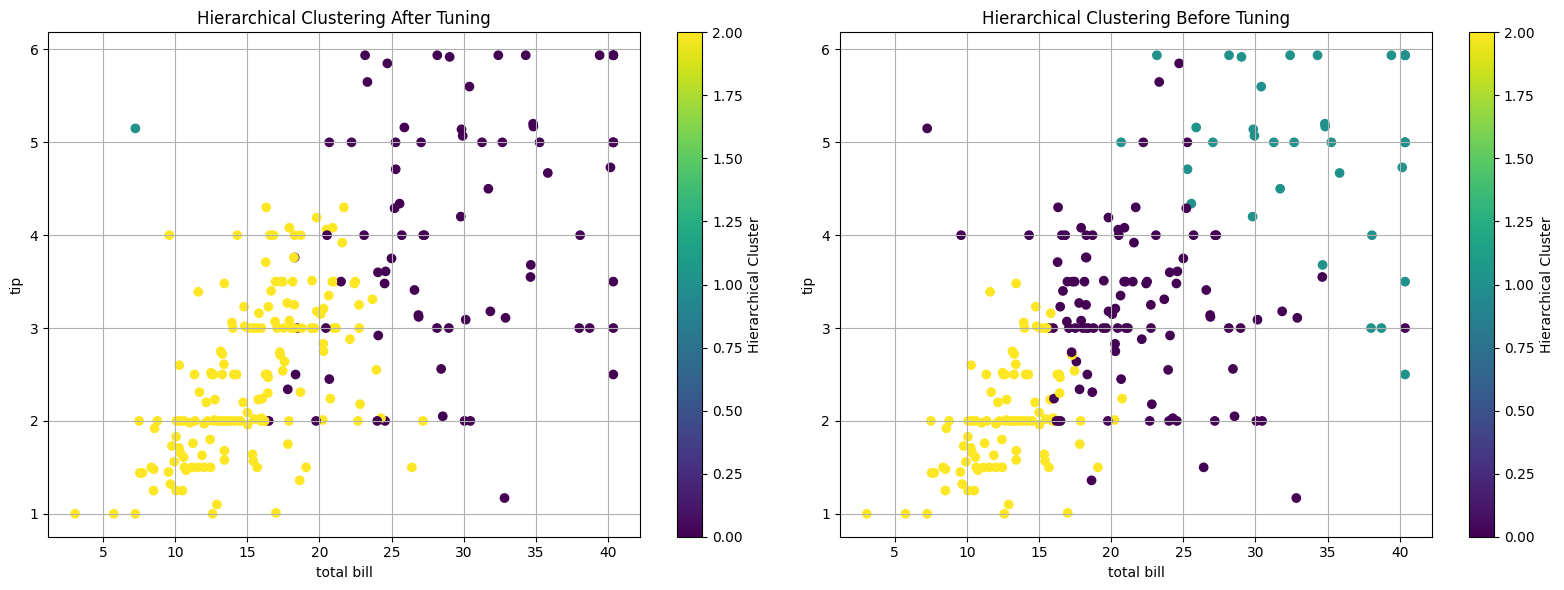

In [948]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(comparison_hc_after_tunning['total_bill'], comparison_hc_after_tunning['tip'], c=comparison_hc_after_tunning["hierarchy_cluster_new"], cmap='viridis')
axes[0].set_xlabel('total bill')
axes[0].set_ylabel('tip')
axes[0].set_title('Hierarchical Clustering After Tuning')
axes[0].grid(True)
fig.colorbar(axes[0].collections[0], ax=axes[0], label='Hierarchical Cluster')

axes[1].scatter(comparison_hc_after_tunning['total_bill'], comparison_hc_after_tunning['tip'], c=comparison_hc_after_tunning["hierarchy_cluster"], cmap='viridis')
axes[1].set_xlabel('total bill')
axes[1].set_ylabel('tip')
axes[1].set_title('Hierarchical Clustering Before Tuning')
axes[1].grid(True)
fig.colorbar(axes[1].collections[0], ax=axes[1], label='Hierarchical Cluster')

plt.tight_layout()
plt.show()

melakukan pemodelan ulang khusus untuk metode Hierarchical Clustering karena setelah menyetel hyperparameter, dan berhasil mendapatkan kombinasi hyperparameter yang memberikan skor yang lebih baik daripada pemodelan sebelumnya. Penyesuaian yang dilakukan pada data menggunakan metode Hierarchical Clustering menghasilkan korelasi yang lebih kuat antara total bill dan lebar tip. Hal ini menunjukkan bahwa penyesuaian tersebut berhasil meningkatkan kualitas data dan membuatnya lebih sesuai untuk analisis statistik.

##**Kesimpulan**

hasil evaluasi diatas dimulai dari confusion matrics dimana metode klasifikasi terbaik adalaha Gaussian NB dan Decision tree classifier, dan lebih efisien dilakukan menggunakan K-means dibandingkan Hierical Clustering, pada Cross-Validation yang ditampilkan, model Gaussian Naive Bayes menunjukkan kinerja yang paling baik di antara ketiga model tersebut. lalu pada feature selection fitur paling penting dalam analisis data ada pada tip dan total bill normalized, selanjutnya pada tahap tuning hyperparameter GaussianNB dan Hierical clustering menunjukan score setelah tuning lebih tinggi dibandingkan sebelum tuning maka dilakukan permodelan ulang sehingga menggunakan score tertinggi